In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv("C:\\Users\\ASUS\\Downloads\\amazon_sales_dataset.csv",index_col='Date')
data=data[data.Store==1]
data=data[ data.Dept==1]
data=data.drop(["max","min","mean","median","std","Unnamed: 3","Type"],axis=1)
data=data.reset_index()
Q1 = np.percentile(data.Weekly_Sales, 25,
                interpolation = 'midpoint')
 
Q3 = np.percentile(data.Weekly_Sales, 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
    
 


# Upper bound
upper = np.where(data.Weekly_Sales >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data.Weekly_Sales <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
data=data.reset_index()
#data.index = pd.to_datetime(data.index)
data['Time'] = np.arange(len(data.index))
data

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,Total_MarkDown,Time
Date,,,,,,,,,,,,,,
05/02/2019,1,1,24924.50,151315,42.31,2.572,211.096358,8.106,0,2019,2,5,0.00,0
12/02/2019,1,1,46039.49,151315,38.51,2.548,211.242170,8.106,1,2019,2,6,0.00,1
19/02/2019,1,1,41595.55,151315,39.93,2.514,211.289143,8.106,0,2019,2,7,0.00,2
26/02/2019,1,1,19403.54,151315,46.63,2.561,211.319643,8.106,0,2019,2,8,0.00,3
05/03/2019,1,1,21827.90,151315,46.50,2.625,211.350143,8.106,0,2019,3,9,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28/09/2021,1,1,18947.81,151315,76.08,3.666,222.981658,6.908,0,2021,9,39,9837.80,133
05/10/2021,1,1,21904.47,151315,68.55,3.617,223.181477,6.573,0,2021,10,40,15339.68,134
12/10/2021,1,1,22764.01,151315,62.99,3.601,223.381296,6.573,0,2021,10,41,8623.10,135


<AxesSubplot:>

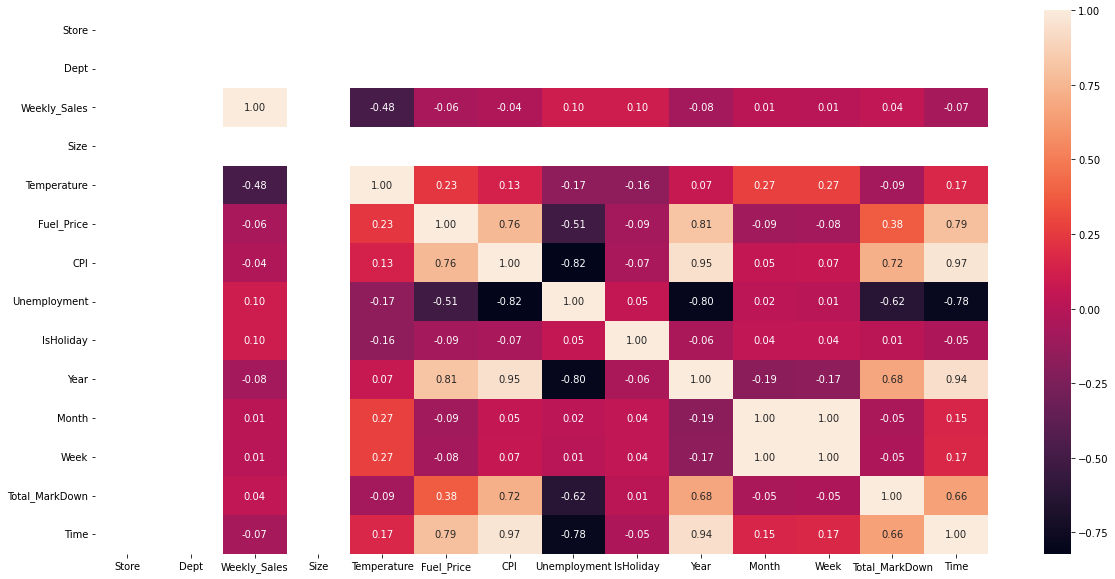

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, fmt='.2f')

In [4]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month', 'Week',
       'Total_MarkDown', 'Time'],
      dtype='object')

In [18]:
X=data.drop('Weekly_Sales',axis=1)
Y=data.Weekly_Sales
X

,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,Total_MarkDown,Time,Lag_1
Date,,,,,,,,,,,,,,
05/02/2019,1,1,151315,42.31,2.572,211.096358,8.106,0,2019,2,5,0.00,0,NaN
12/02/2019,1,1,151315,38.51,2.548,211.242170,8.106,1,2019,2,6,0.00,1,24924.50
19/02/2019,1,1,151315,39.93,2.514,211.289143,8.106,0,2019,2,7,0.00,2,46039.49
26/02/2019,1,1,151315,46.63,2.561,211.319643,8.106,0,2019,2,8,0.00,3,41595.55
05/03/2019,1,1,151315,46.50,2.625,211.350143,8.106,0,2019,3,9,0.00,4,19403.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28/09/2021,1,1,151315,76.08,3.666,222.981658,6.908,0,2021,9,39,9837.80,133,19251.50
05/10/2021,1,1,151315,68.55,3.617,223.181477,6.573,0,2021,10,40,15339.68,134,18947.81
12/10/2021,1,1,151315,62.99,3.601,223.381296,6.573,0,2021,10,41,8623.10,135,21904.47


In [6]:
from sklearn.model_selection import train_test_split
import numpy
import numpy as np
#tr_X, val_X, tr_Y, val_Y = train_test_split(X,Y,random_state=0)
#val_X
tr_X=X[:100]
tr_Y=Y[:100]
val_X=X[100:138]
val_Y=Y[100:138]
tr_X

,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,Total_MarkDown,Time
Date,,,,,,,,,,,,,
05/02/2019,1,1,151315,42.31,2.572,211.096358,8.106,0,2019,2,5,0.00,0
12/02/2019,1,1,151315,38.51,2.548,211.242170,8.106,1,2019,2,6,0.00,1
19/02/2019,1,1,151315,39.93,2.514,211.289143,8.106,0,2019,2,7,0.00,2
26/02/2019,1,1,151315,46.63,2.561,211.319643,8.106,0,2019,2,8,0.00,3
05/03/2019,1,1,151315,46.50,2.625,211.350143,8.106,0,2019,3,9,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
09/12/2020,1,1,151315,43.93,3.158,218.961846,7.866,0,2020,12,49,22865.91,95
16/12/2020,1,1,151315,51.63,3.159,219.179453,7.866,0,2020,12,50,9662.85,96
23/12/2020,1,1,151315,47.96,3.112,219.357722,7.866,0,2020,12,51,6164.87,97


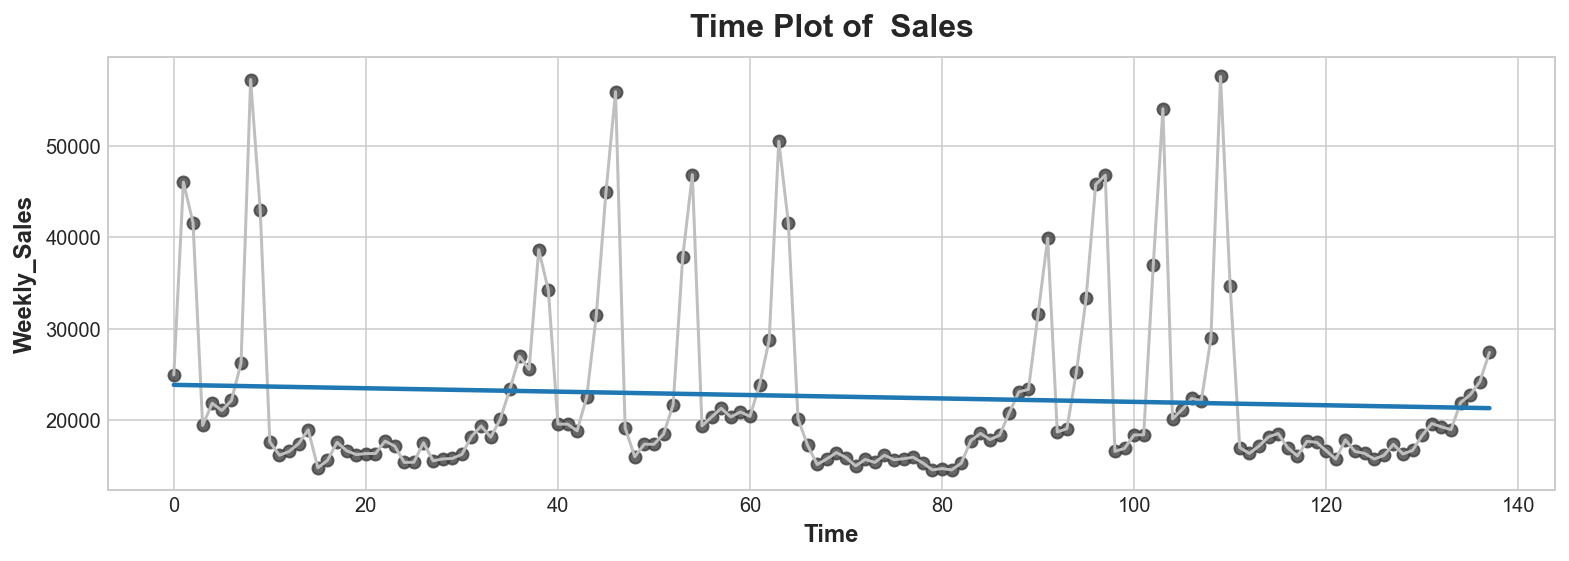

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Weekly_Sales', data=data, color='0.75')
ax = sns.regplot(x='Time', y='Weekly_Sales', data=data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of  Sales');

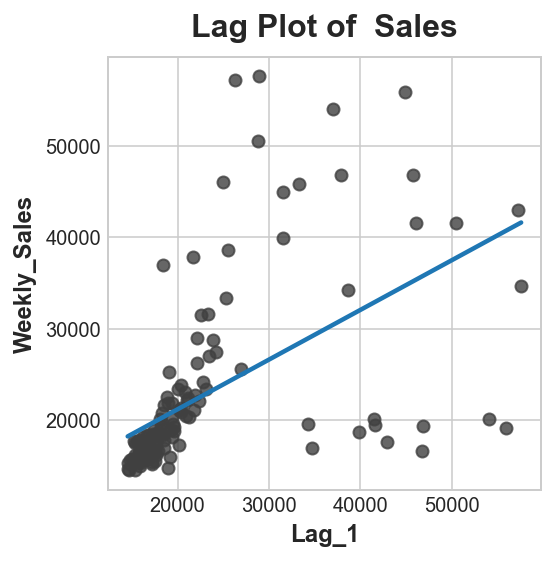

In [8]:
data['Lag_1'] = data['Weekly_Sales'].shift(1)
data = data.reindex()
df=data[["Weekly_Sales","Lag_1"]]
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Weekly_Sales', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of  Sales');

In [9]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'
data

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,Total_MarkDown,Time,Lag_1
Date,,,,,,,,,,,,,,,
05/02/2019,1,1,24924.50,151315,42.31,2.572,211.096358,8.106,0,2019,2,5,0.00,0,NaN
12/02/2019,1,1,46039.49,151315,38.51,2.548,211.242170,8.106,1,2019,2,6,0.00,1,24924.50
19/02/2019,1,1,41595.55,151315,39.93,2.514,211.289143,8.106,0,2019,2,7,0.00,2,46039.49
26/02/2019,1,1,19403.54,151315,46.63,2.561,211.319643,8.106,0,2019,2,8,0.00,3,41595.55
05/03/2019,1,1,21827.90,151315,46.50,2.625,211.350143,8.106,0,2019,3,9,0.00,4,19403.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28/09/2021,1,1,18947.81,151315,76.08,3.666,222.981658,6.908,0,2021,9,39,9837.80,133,19251.50
05/10/2021,1,1,21904.47,151315,68.55,3.617,223.181477,6.573,0,2021,10,40,15339.68,134,18947.81
12/10/2021,1,1,22764.01,151315,62.99,3.601,223.381296,6.573,0,2021,10,41,8623.10,135,21904.47


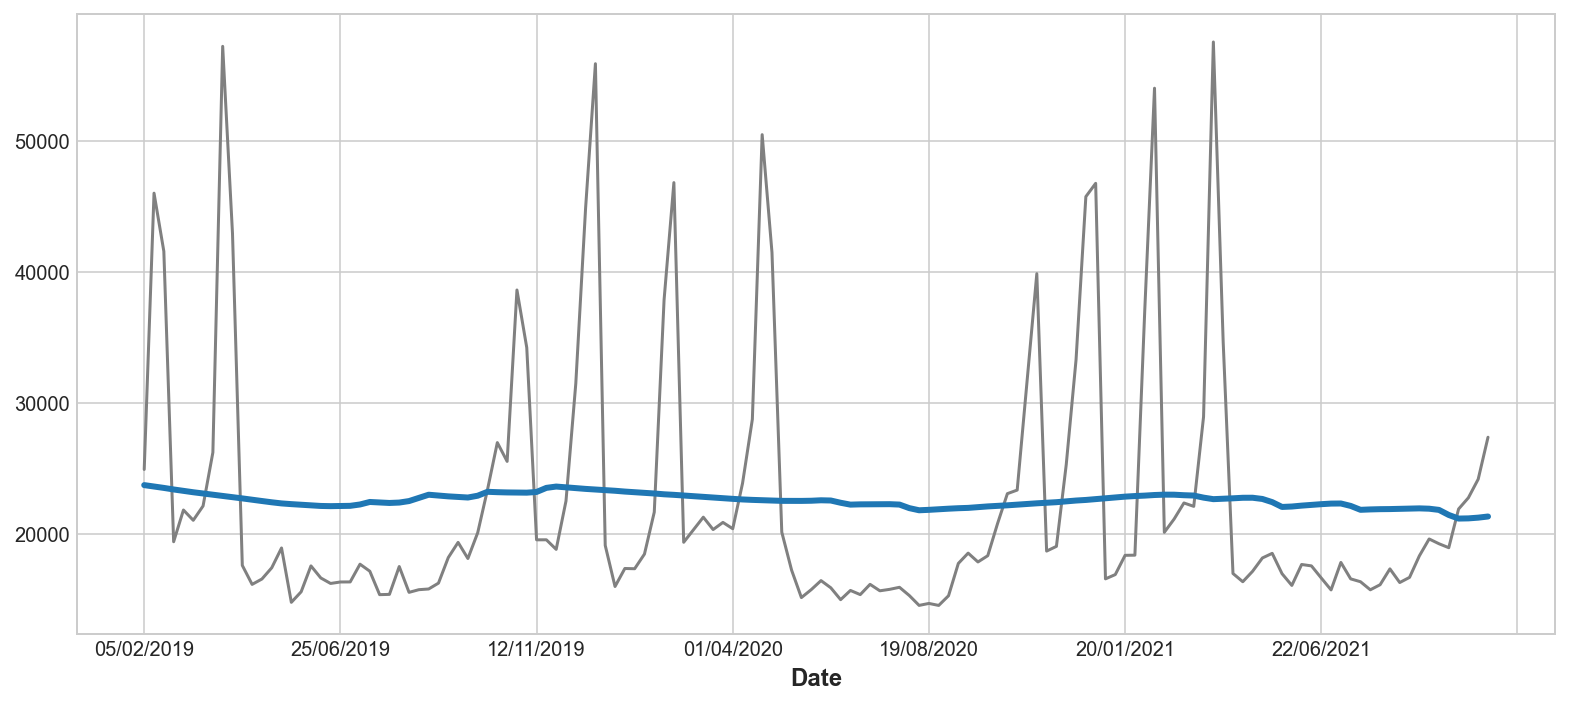

In [10]:
moving_average = data["Weekly_Sales"].rolling(
  window=138,
  center=True,
  min_periods=69
).mean()              

ax = data["Weekly_Sales"].plot(style="-", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, legend=False,
);

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=False)
model.fit(X,Y)
y_pred = pd.Series(model.predict(X), index=X.index)

In [19]:
Y

Date
05/02/2019    24924.50
12/02/2019    46039.49
19/02/2019    41595.55
26/02/2019    19403.54
05/03/2019    21827.90
                ...   
28/09/2021    18947.81
05/10/2021    21904.47
12/10/2021    22764.01
19/10/2021    24185.27
26/10/2021    27390.81
Name: Weekly_Sales, Length: 138, dtype: float64

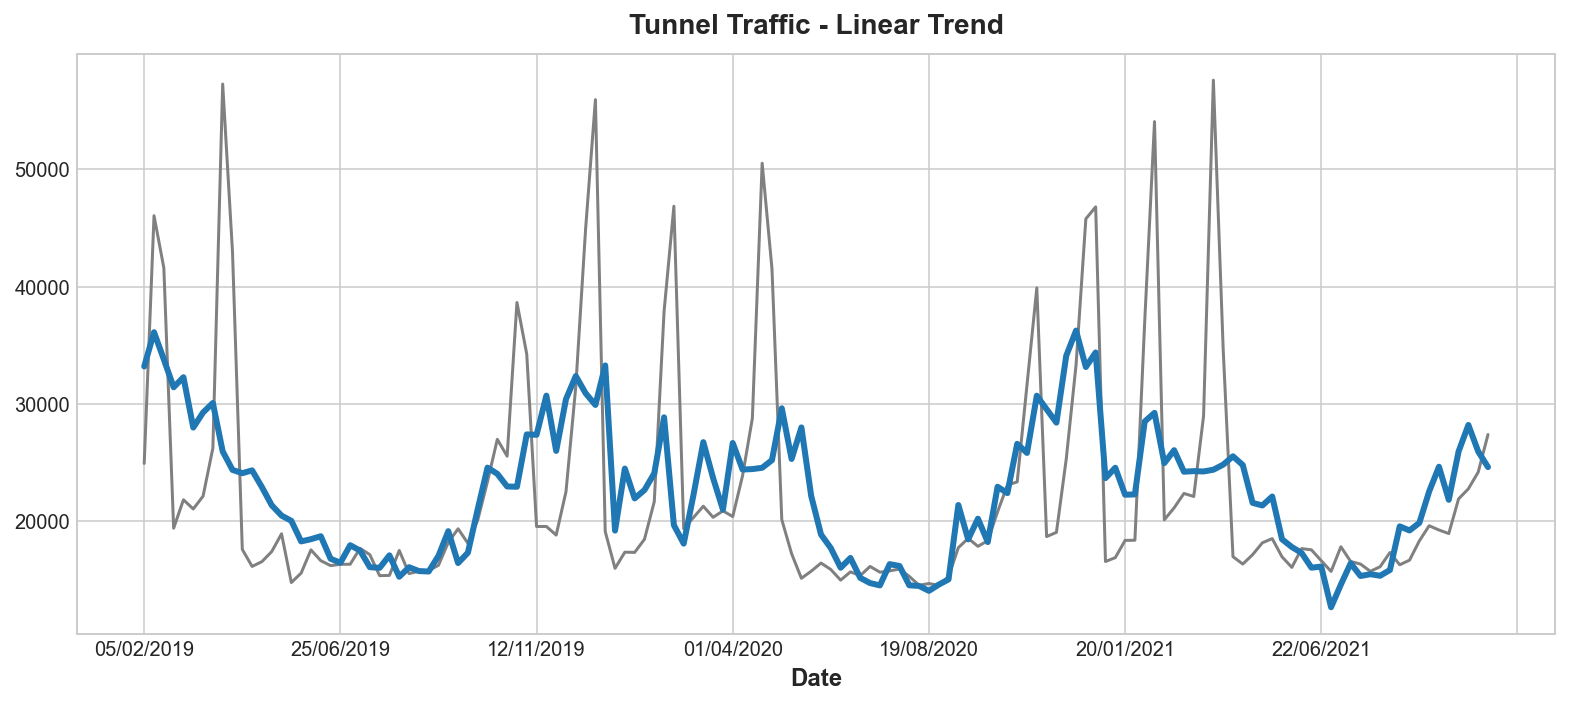

In [13]:
ax = data["Weekly_Sales"].plot(style="-", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [14]:
data.index

Index(['05/02/2019', '12/02/2019', '19/02/2019', '26/02/2019', '05/03/2019',
       '12/03/2019', '19/03/2019', '26/03/2019', '02/04/2019', '09/04/2019',
       ...
       '24/08/2021', '31/08/2021', '07/09/2021', '14/09/2021', '21/09/2021',
       '28/09/2021', '05/10/2021', '12/10/2021', '19/10/2021', '26/10/2021'],
      dtype='object', name='Date', length=138)

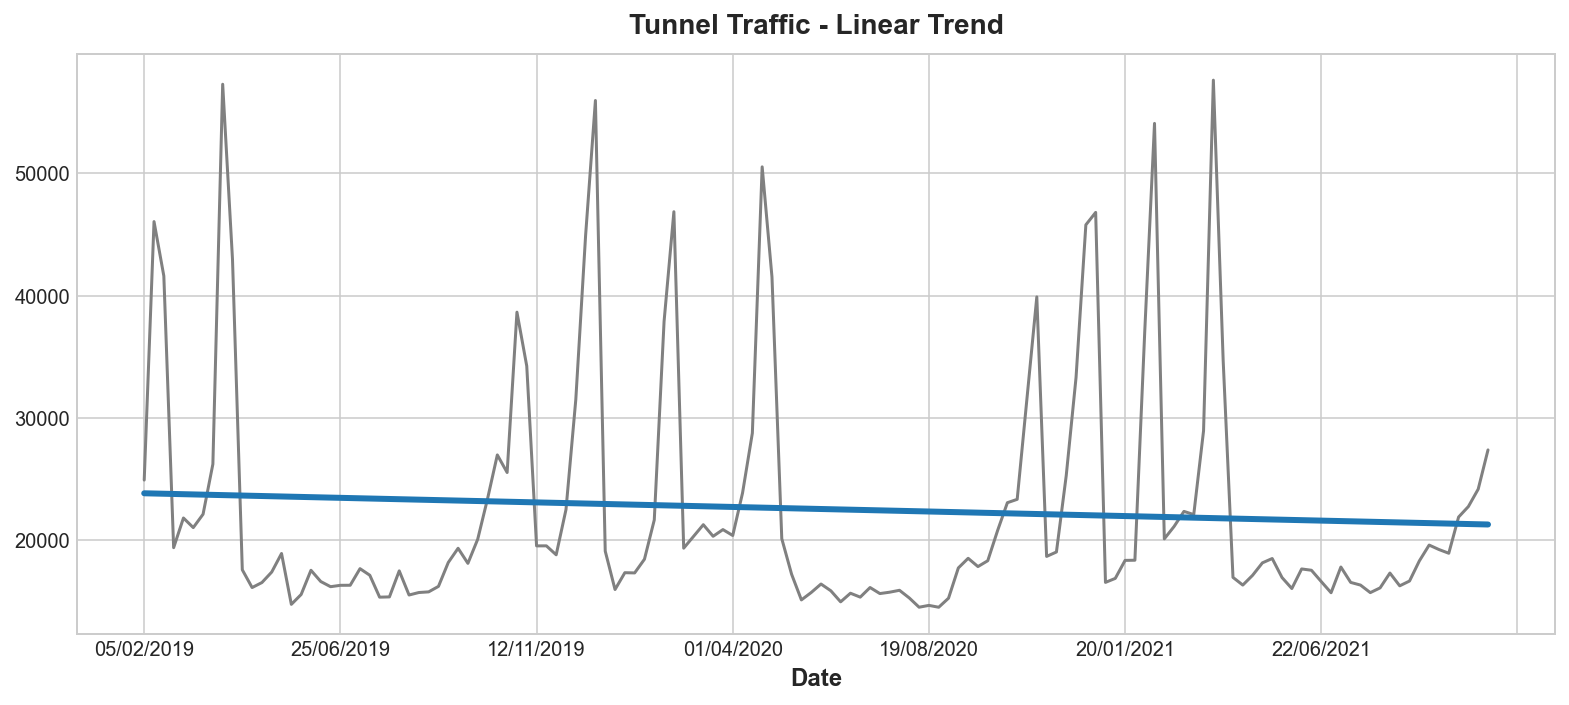

In [15]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=data.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

from sklearn.linear_model import LinearRegression
y = data["Weekly_Sales"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
ax = data["Weekly_Sales"].plot(style="-", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


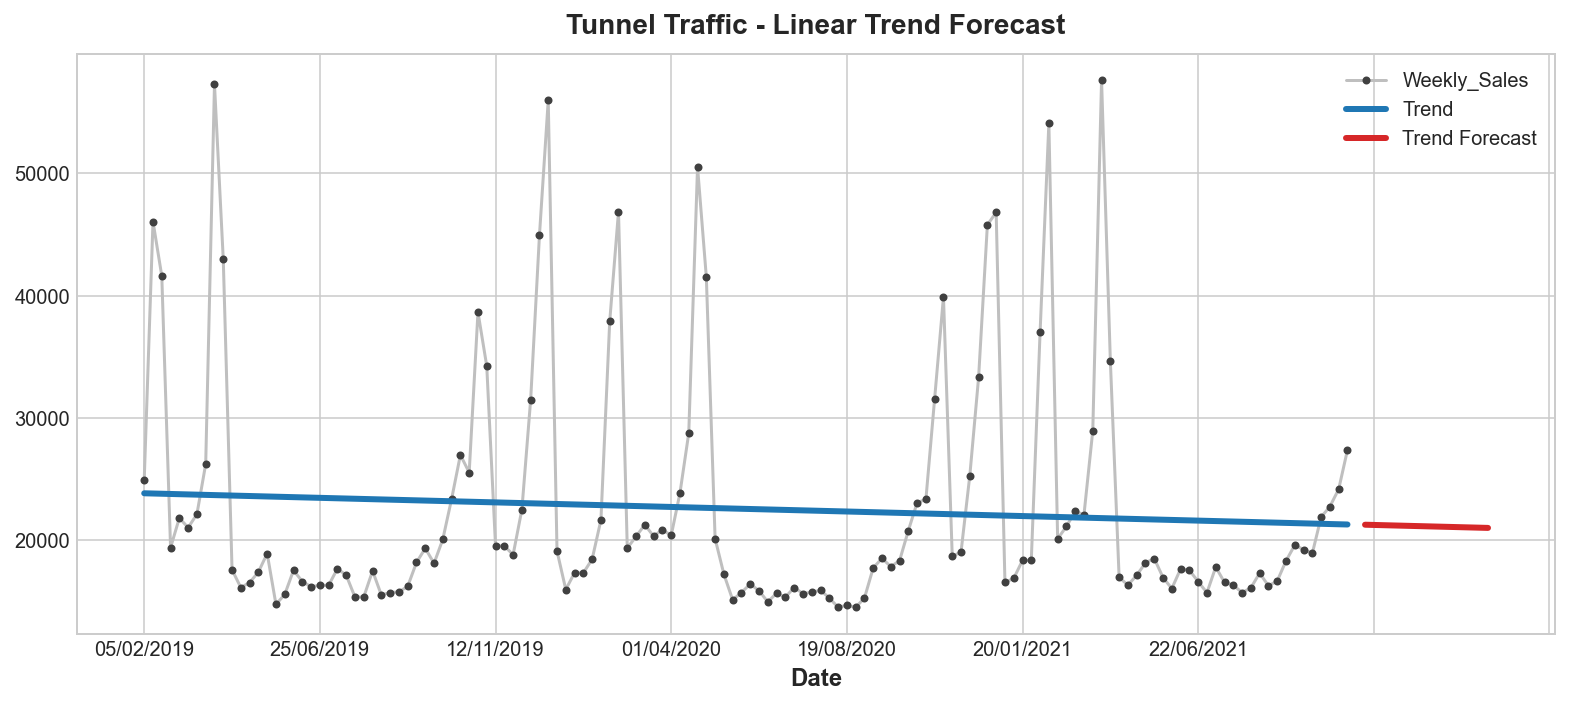

In [16]:

X = dp.out_of_sample(steps=15)

y_fore = pd.Series(model.predict(X), index=X.index)

y_fore.head()
ax = data["Weekly_Sales"].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

In [17]:
data.index
df1=data
df1.index = pd.to_datetime(df1.index,format='%d / %m / %Y')

from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq= "A", order=10)
df_fourier = fourier.in_sample(df1.index)
df_fourier

ValueError: time data '05/02/2019' does not match format '%d / %m / %Y' (match)

In [ ]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess, Seasonality

fourier = CalendarFourier(freq= "A", order=4)  # 10 sin/cos pairs for "A"nnual seasonality
"""
dp = DeterministicProcess(
    index=data.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[CalendarFourier(freq= "A", order=4) ],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)"""
dp=Seasonality(11)
X = dp.in_sample(data.index)
y = data["Weekly_Sales"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=data.index)

ax = y.plot(color='0.25', style='-', title="Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

TypeError: Seasonality.out_of_sample() missing 1 required positional argument: 'index'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
object_cols = [col for col in tr_X.columns if tr_X[col].dtype == "object"]
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(tr_X[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(val_X[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = tr_X.index
OH_cols_valid.index = val_X.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = tr_X.drop(object_cols, axis=1)
num_X_valid = val_X.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
OH_X_train

,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,...,91,92,93,94,95,96,97,98,99,100
0,1,1,151315,42.31,2.572,211.096358,8.106,0,2019,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3459,1,1,151315,38.51,2.548,211.242170,8.106,1,2019,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7566,1,1,151315,39.93,2.514,211.289143,8.106,0,2019,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8759,1,1,151315,46.63,2.561,211.319643,8.106,0,2019,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12901,1,1,151315,46.50,2.625,211.350143,8.106,0,2019,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252493,1,1,151315,43.93,3.158,218.961846,7.866,0,2020,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254994,1,1,151315,51.63,3.159,219.179453,7.866,0,2020,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
256992,1,1,151315,47.96,3.112,219.357722,7.866,0,2020,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
261086,1,1,151315,49.01,3.157,219.714258,7.348,0,2021,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

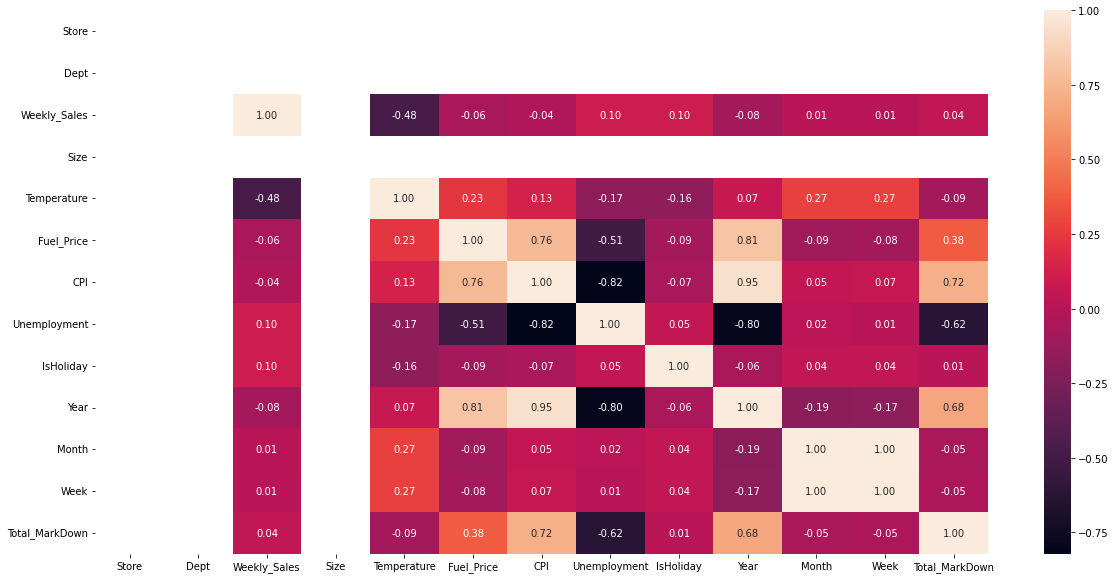

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, fmt='.2f')

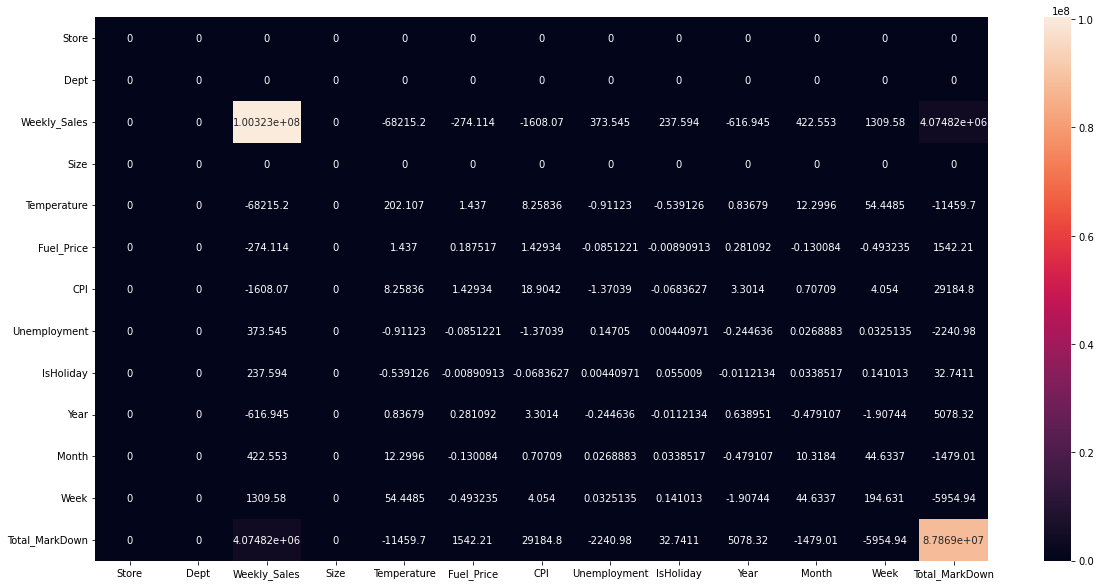

In [ ]:
cov_matrix = pd.DataFrame.cov(data)
plt.figure(figsize=(20,10))
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
model_sales=LinearRegression()
model_sales.fit(tr_X, tr_Y)
pred_sales=model_sales.predict(val_X)


In [ ]:
plt.figure(figsize=(15,7))
plt.plot(data['Date'], data['Weekly_Sales'])
plt.plot(tr_X['Date'], pred_sales)
plt.title("Customer Sales Forecast using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

KeyError: 'Date'

<Figure size 1080x504 with 0 Axes>

In [ ]:
from neuralprophet import NeuralProphet

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchmetrics\functional\text\chrf.py:43: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:77.)
  _EPS_SMOOTHING = tensor(1e-16)


In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("C:\\Users\\ASUS\\Downloads\\amazon_sales_dataset.csv")
data=data[data.Store==1]
data=data[ data.Dept==1]
data=data.drop(["max","min","mean","median","std","Unnamed: 3","Type"],axis=1)
data["ds"] = pd.to_datetime(data.Date)
data["y"]=data.Weekly_Sales
data['Time'] = np.arange(len(data.Date))
data

WARNING - (py.warnings._showwarnmsg) - C:\Users\ASUS\AppData\Local\Temp\ipykernel_15384\3521156128.py:7: UserWarning: Parsing '19/02/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["ds"] = pd.to_datetime(data.Date)

WARNING - (py.warnings._showwarnmsg) - C:\Users\ASUS\AppData\Local\Temp\ipykernel_15384\3521156128.py:7: UserWarning: Parsing '26/02/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["ds"] = pd.to_datetime(data.Date)

WARNING - (py.warnings._showwarnmsg) - C:\Users\ASUS\AppData\Local\Temp\ipykernel_15384\3521156128.py:7: UserWarning: Parsing '19/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["ds"] = pd.to_datetime(data.Date)

WARNING - (py.warnings._showwarnmsg) - C:\Users\ASUS\AppData\Local\Temp\ipykernel_15384\3521156128.py:7: UserWarning: Parsing '26/03/2019' in DD/MM/YYYY format.

,Date,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,Total_MarkDown,ds,y,Time
0,05/02/2019,1,1,24924.50,151315,42.31,2.572,211.096358,8.106,0,2019,2,5,0.00,2019-05-02,24924.50,0
3459,12/02/2019,1,1,46039.49,151315,38.51,2.548,211.242170,8.106,1,2019,2,6,0.00,2019-12-02,46039.49,1
7566,19/02/2019,1,1,41595.55,151315,39.93,2.514,211.289143,8.106,0,2019,2,7,0.00,2019-02-19,41595.55,2
8759,26/02/2019,1,1,19403.54,151315,46.63,2.561,211.319643,8.106,0,2019,2,8,0.00,2019-02-26,19403.54,3
12901,05/03/2019,1,1,21827.90,151315,46.50,2.625,211.350143,8.106,0,2019,3,9,0.00,2019-05-03,21827.90,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361146,28/09/2021,1,1,18947.81,151315,76.08,3.666,222.981658,6.908,0,2021,9,39,9837.80,2021-09-28,18947.81,133
363002,05/10/2021,1,1,21904.47,151315,68.55,3.617,223.181477,6.573,0,2021,10,40,15339.68,2021-05-10,21904.47,134
366639,12/10/2021,1,1,22764.01,151315,62.99,3.601,223.381296,6.573,0,2021,10,41,8623.10,2021-12-10,22764.01,135
370359,19/10/2021,1,1,24185.27,151315,67.97,3.594,223.425723,6.573,0,2021,10,42,3348.36,2021-10-19,24185.27,136


In [ ]:
X=data.drop('Weekly_Sales',axis=1)
Y=data.drop("ds",axis=1)
tr=data[["ds","y"]]
tr

,ds,y
0,2019-05-02,24924.50
3459,2019-12-02,46039.49
7566,2019-02-19,41595.55
8759,2019-02-26,19403.54
12901,2019-05-03,21827.90
...,...,...
361146,2021-09-28,18947.81
363002,2021-05-10,21904.47
366639,2021-12-10,22764.01
370359,2021-10-19,24185.27


In [ ]:
from sklearn.model_selection import train_test_split
import numpy
#tr_X, val_X, tr_Y, val_Y = train_test_split(X,Y,random_state=0)
#val_X
tr_X=X[:100]
tr_Y=Y[:100]
val_X=X[100:138]
val_Y=Y[100:138]
tr=tr[:100]
test=tr[100:]
tr

,ds,y
0,2019-05-02,24924.50
3459,2019-12-02,46039.49
7566,2019-02-19,41595.55
8759,2019-02-26,19403.54
12901,2019-05-03,21827.90
...,...,...
252493,2020-09-12,33305.92
254994,2020-12-16,45773.03
256992,2020-12-23,46788.75
261086,2021-06-01,16567.69


In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
m= NeuralProphet()

In [ ]:
Date=m.fit(tr,freq="D",validation_df=test,progress="plot")


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 38.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


RuntimeError: Numpy is not available